In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 1.05, '$10^6$')

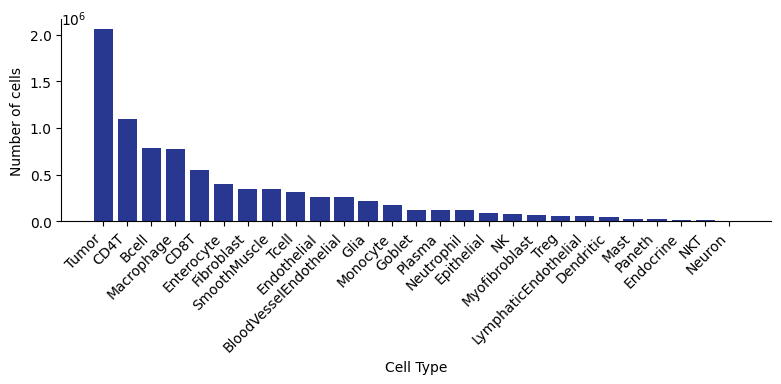

In [2]:
df_count_by_type = pd.read_csv('../data/count_by_type.csv', header=None)

categories = df_count_by_type[0].values
values = df_count_by_type[1].values

fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.bar(categories, values, color="#283890")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of cells')
plt.xlabel('Cell Type')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
def formatter(x, pos):
    return str(round(x / 1e6, 1))
ax.yaxis.set_major_formatter(formatter)
ax.text(0, 1.05, "$10^6$", transform = ax.transAxes, ha = "left", va = "top")

/tmp/ipykernel_2398001/3679450776.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_count_by_lineage = df_count_by_type.groupby('lineage').sum().reset_index()


Text(0, 1.05, '$10^6$')

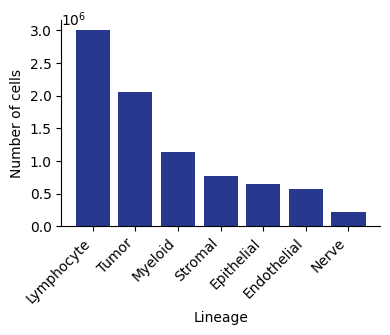

In [3]:
with open('../data/lineage_mapping.yaml') as f:
    linage_mapping = yaml.safe_load(f)

df_count_by_type['lineage'] = df_count_by_type[0].map(linage_mapping)
df_count_by_lineage = df_count_by_type.groupby('lineage').sum().reset_index()
df_count_by_lineage = df_count_by_lineage.sort_values(1, ascending=False)

categories = df_count_by_lineage['lineage'].values
values = df_count_by_lineage[1].values

fig, ax = plt.subplots(figsize=(4, 3.5))
bars = plt.bar(categories, values, color="#283890")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of cells')
plt.xlabel('Lineage')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
ax.yaxis.set_major_formatter(formatter)
ax.text(0, 1.05, "$10^6$", transform = ax.transAxes, ha = "left", va = "top")

Text(0, 1.05, '$10^6$')

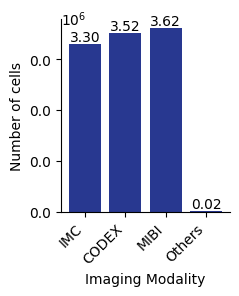

In [4]:
df_count_by_imaging_modality = pd.read_csv('../data/count_by_imaging_modality.csv', header=None)

df_count_by_imaging_modality = df_count_by_imaging_modality.set_index(0)
df_count_by_imaging_modality.loc['Others'] = df_count_by_imaging_modality.loc['IBEX']  + df_count_by_imaging_modality.loc['MACSima'] + df_count_by_imaging_modality.loc['CellDIVE']
df_count_by_imaging_modality = df_count_by_imaging_modality.drop(['IBEX', 'MACSima', 'CellDIVE'])
df_count_by_imaging_modality = df_count_by_imaging_modality.reset_index()

categories = df_count_by_imaging_modality[0].values
values = df_count_by_imaging_modality[1].values

fig, ax = plt.subplots(figsize=(2.5, 3))
bars = plt.bar(categories, [v/10**6 for v in values], color="#283890")
plt.xticks(rotation=45, ha='right')
ax.bar_label(bars, fmt="%.2f")
plt.ylabel('Number of cells')
plt.xlabel('Imaging Modality')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
ax.yaxis.set_major_formatter(formatter)

ax.text(0, 1.05, "$10^6$", transform = ax.transAxes, ha = "left", va = "top")

Text(0, 1.05, '$10^6$')

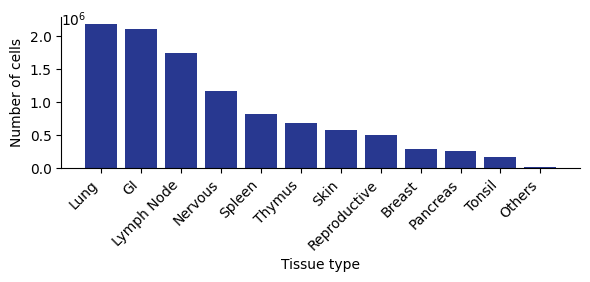

In [5]:
df_count_by_tissue = pd.read_csv('../data/count_by_tissue.csv', header=None)

df_count_by_tissue = df_count_by_tissue.set_index(0)
df_count_by_tissue.loc['Others'] = df_count_by_tissue.loc['Renal'] + df_count_by_tissue.loc['Liver']
df_count_by_tissue = df_count_by_tissue.drop(['Renal', 'Liver'])
df_count_by_tissue = df_count_by_tissue.reset_index()

categories = df_count_by_tissue[0].values
values = df_count_by_tissue[1].values
# replace 'Lymph_Node' with 'Lymph Node'
categories = [ct.replace("_", " ") for ct in categories]

fig, ax = plt.subplots(figsize=(6, 3))
bars = plt.bar(categories, values, color="#283890")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of cells')
plt.xlabel('Tissue type')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
ax.yaxis.set_major_formatter(formatter)
ax.text(0, 1.05, "$10^6$", transform = ax.transAxes, ha = "left", va = "top")
